In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import seaborn as sns

%matplotlib inline


In [436]:
jtplot.style(theme='monokai')

# Import data
Remember! I'm only using the working lyrics on day one as I am still importing lyric data

In [437]:
chart_df = pd.read_csv('../data/all_charts.csv')
lyrics_df = pd.read_csv('../data/lyrics_second_pass.csv')
spotify_df = pd.read_csv('../data/spotify_data.csv')

/Users/AndrewKraemer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [438]:
chart_df.head(2)

,Unnamed: 0,chartDate,title,artist,peakPos,lastPos,weeks,rank,change,spotifyID,...,art_6,art_7,art_8,art_9,art_10,art_11,art_12,art_13,art_14,art_15
0,0,1958-08-16,Poor Little Fool,Ricky Nelson,1,1,11,1,0,33FPsMEl3UwpytDuyf9VYq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1958-08-16,Nel Blu Dipinto Di Blu (VolarÃÂ©),Domenico Modugno,1,54,16,2,+52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
lyrics_df.head(2)

,Song,Artist,spotifyID,Lyrics,Source
0,poor little fool,ricky nelson,33FPsMEl3UwpytDuyf9VYq,i used to play around with hearts that hastene...,1.0
1,nel blu dipinto di blu volar~a^a,domenico modugno,NaN,not set yet,NaN


In [440]:
spotify_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_uri,duration_ms,time_signature,key_mode
0,0.549,0.336,C,-11.669,major,0.0290,0.6520,0.000,0.134,0.802,154.958,33FPsMEl3UwpytDuyf9VYq,153933.0,4,C major
1,0.696,0.743,C#,-6.623,major,0.0439,0.0836,0.197,0.119,0.776,137.276,0nG4SbrAONIFLIwQqegooj,138747.0,4,C# major


In [441]:
# keep relevant columns
# chart_df.columns.tolist()

chart_cols = ['chartDate', 'title', 'artist', 'peakPos', 'lastPos', 'weeks', 'rank', 'change','spotifyID']
chart_df = chart_df[chart_cols]

In [453]:
# combine chart_df with spotify data
df = pd.merge(chart_df, spotify_df, left_on='spotifyID', right_on = 'track_uri', how='inner')

In [454]:
df = df.drop_duplicates()

In [430]:
chart_len = chart_df.shape[0]
spot_len = df.shape[0]
print('chart_songs: ' + str(chart_len), 
     '\nspotify_songs: ' + str(spot_len),
     '\npercent_overlap: ' + str(round((spot_len / chart_len)*100, 2)) + '%')

chart_songs: 304643 
spotify_songs: 258830 
percent_overlap: 84.96%


In [383]:
# combine df with lyric data
# todo deal with ~ 100 dups
# df = pd.merge(df, lyrics_df, on='spotifyID', how='left')

In [431]:
# convert to datetime
df['chartDate'] = pd.to_datetime(df[('chartDate')])

In [432]:
df['year'] = df['chartDate'].dt.year

In [433]:
df['month'] = df['chartDate'].dt.month

Check matchups

<function matplotlib.pyplot.show>

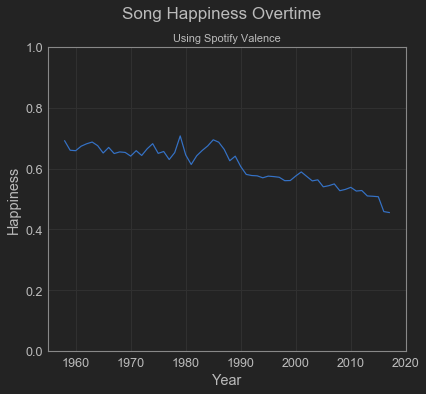

In [387]:
by_year_df = df.groupby('year')['valence','liveness'].mean().reset_index()

# sns.barplot(x = 'year', y = 'valence', data = df)

plt.plot(by_year_df['year'], by_year_df['valence'])
plt.suptitle('Song Happiness Overtime', fontsize = 17)
plt.title('Using Spotify Valence', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.ylim(0, 1)
plt.show

<function matplotlib.pyplot.show>

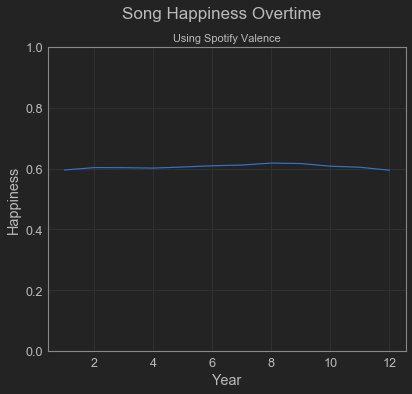

In [388]:
by_month_df = df.groupby('month')['valence','liveness'].mean().reset_index()

plt.plot(by_month_df['month'], by_month_df['valence'])
plt.suptitle('Song Happiness Overtime', fontsize = 17)
plt.title('Using Spotify Valence', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.ylim(0, 1)
plt.show

# Explore text 

In [408]:
lyrics_df = lyrics_df[lyrics_df['Source'].notnull()]

In [390]:
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
Song         0 non-null object
Artist       0 non-null object
spotifyID    0 non-null object
Lyrics       0 non-null object
Source       0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [391]:
# from spacy.tokenizer import Tokenizer
# tokenizer = Tokenizer(nlp.vocab)

In [409]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=5000)
vectorized = cv.fit_transform(lyrics_df['Lyrics'])
words = cv.get_feature_names()

In [410]:
word_counts = pd.DataFrame.from_dict({word: vectorized.getcol(idx).sum() for word, idx in cv.vocabulary_.items()}, orient='index').reset_index()

In [411]:
word_counts.columns = ['word', 'count']

In [412]:
top_words = word_counts.sort_values('count', ascending = False).head(20)
top_words

,word,count
152,love,67254
343,im,59816
154,dont,46610
109,know,43294
77,like,39185
98,just,37936
8,oh,35941
160,baby,35642
40,want,33225
74,got,32930


In [413]:
word_counts.sort_values('count', ascending = False).tail()

,word,count
2707,bites,41
3756,ruff,41
3736,unfair,41
1495,worthy,41
558,fantastic,41


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

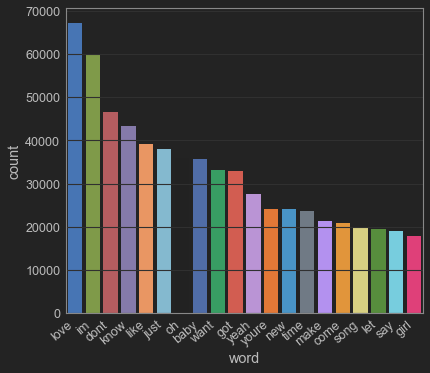

In [414]:
sns.barplot(x = 'word', 
            y = 'count', data = top_words )
plt.xticks(rotation=40, ha = 'right')

In [396]:
# import spacy 
# nlp = spacy.load(“en”)
# https://www.analyticsvidhya.com/blog/2017/04/natural-language-processing-made-easy-using-spacy-%E2%80%8Bin-python/

In [397]:
from textblob import TextBlob

In [398]:
# test_df = lyrics_df.iloc[:5,]
# TextBlob(test_df.iloc[1,3])

# test_df['polarity'] = test_df['Lyrics'].apply(lambda lyric: TextBlob(lyric).sentiment.polarity)
# test_df['subjectivity'] = test_df['Lyrics'].apply(lambda lyric: TextBlob(lyric).sentiment.subjectivity)

In [415]:
lyrics_df['tb_obj'] = lyrics_df['Lyrics'].apply(lambda lyric: TextBlob(lyric))
lyrics_df['polarity'] = lyrics_df['tb_obj'].apply(lambda tb_obj: tb_obj.sentiment.polarity)
lyrics_df['subjectivity'] = lyrics_df['tb_obj'].apply(lambda tb_obj: tb_obj.sentiment.subjectivity)

In [416]:
lyrics_df.head()

,Song,Artist,spotifyID,Lyrics,Source,tb_obj,polarity,subjectivity
0,poor little fool,ricky nelson,33FPsMEl3UwpytDuyf9VYq,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
2,patricia,perez prado and his orchestra,0nG4SbrAONIFLIwQqegooj,kiss her and your lips will always want patric...,2.0,"(k, i, s, s, , h, e, r, , a, n, d, , y, o, ...",0.220000,0.520000
3,splish splash,bobby darin,6NCPbpsr2N4w6YIZkpq6jx,splish splash i was taking a bath long about a...,1.0,"(s, p, l, i, s, h, , s, p, l, a, s, h, , i, ...",0.283766,0.364935
4,when,kalin twins,52l2PCOwU2n2zfTlc0pEov,when when you smile when you smile at me well ...,2.0,"(w, h, e, n, , w, h, e, n, , y, o, u, , s, ...",0.378042,0.437302
5,my true love,jack scott,2urRqmAFhjZKo8Z6sEGzEv,i prayed to the lord to send me a love he sent...,1.0,"(i, , p, r, a, y, e, d, , t, o, , t, h, e, ...",0.356469,0.582780


In [417]:
df_w_l = pd.merge(df, lyrics_df, on = 'spotifyID', how = 'inner')

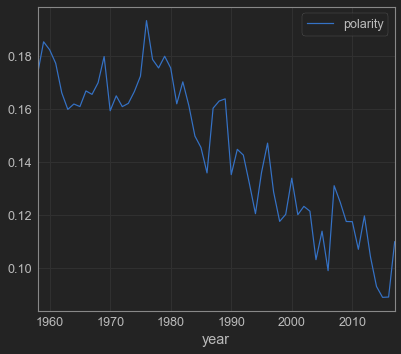

In [418]:
df_w_l.groupby('year')['polarity'].mean().reset_index().plot('year', 'polarity')

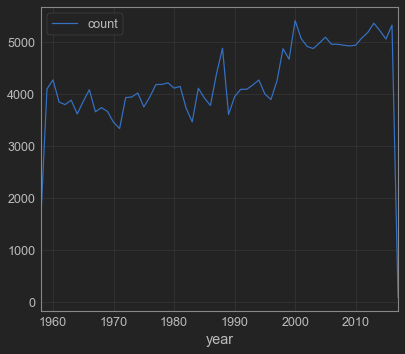

In [420]:
df_w_l.groupby('year')['spotifyID'].count().reset_index(name = 'count').plot('year', 'count')

In [421]:
df_w_l

,chartDate,title,artist,peakPos,lastPos,weeks,rank,change,spotifyID,danceability,...,key_mode,year,month,Song,Artist,Lyrics,Source,tb_obj,polarity,subjectivity
0,1958-08-16,Poor Little Fool,Ricky Nelson,1,1,11,1,0,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
1,1958-08-16,Poor Little Fool,Ricky Nelson,1,1,11,1,0,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
2,1958-08-23,Poor Little Fool,Ricky Nelson,1,1,11,4,-3,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
3,1958-08-23,Poor Little Fool,Ricky Nelson,1,1,11,4,-3,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
4,1958-08-30,Poor Little Fool,Ricky Nelson,1,4,11,6,-2,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
5,1958-08-30,Poor Little Fool,Ricky Nelson,1,4,11,6,-2,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,8,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
6,1958-09-06,Poor Little Fool,Ricky Nelson,1,6,11,5,+1,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,9,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
7,1958-09-06,Poor Little Fool,Ricky Nelson,1,6,11,5,+1,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,9,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
8,1958-09-13,Poor Little Fool,Ricky Nelson,1,5,11,6,-1,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,9,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
9,1958-09-13,Poor Little Fool,Ricky Nelson,1,5,11,6,-1,33FPsMEl3UwpytDuyf9VYq,0.549,...,C major,1958,9,poor little fool,ricky nelson,i used to play around with hearts that hastene...,1.0,"(i, , u, s, e, d, , t, o, , p, l, a, y, , ...",-0.115390,0.498939
